# 1. Install Dependencies and Setup

In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of tensorflow-gpu to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of tensorflow-gpu to determine which version is compatible with other requirements. This could take a while.
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort 

Requested tensorflow-gpu from https://files.pythonhosted.org/packages/8a/45/fa31ced1db38f9424f262dfbf35747fe5378b5c808cecb373c8cb8e515d3/tensorflow-gpu-2.12.0.tar.gz has invalid metadata: Expected end or semicolon (after name and no valid version specifier)
    python_version>"3.7"
                  ^
Please use pip<24.1 if you need to use this version.
Requested tensorflow-gpu from https://files.pythonhosted.org/packages/8a/45/fa31ced1db38f9424f262dfbf35747fe5378b5c808cecb373c8cb8e515d3/tensorflow-gpu-2.12.0.tar.gz has invalid metadata: Expected end or semicolon (after name and no valid version specifier)
    python_version>"3.7"
                  ^
Please use pip<24.1 if you need to use this version.
Requested tensorflow-gpu from https://files.pythonhosted.org/packages/8a/45/fa31ced1db38f9424f262dfbf35747fe5378b5c808cecb373c8cb8e515d3/tensorflow-gpu-2.12.0.tar.gz has invalid metadata: Expected end or semicolon (after name and no valid version specifier)
    python_version>"3.7"
     

INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ---------------------------------------- 0.0/455.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/455.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/455.9 MB 2.0 MB/s eta 0:03:51
   ---------------------------------------- 1.0/455.9 MB 2.2 MB/s eta 0:03:29
   ---------------------------------------- 1.0/455.9 MB 2.2 MB/s eta 0:03:29
   ---------------------------------------- 1.3/455.9 MB 1.2 MB/s eta 0:06:13
   ---------------------------------------- 1.8/455.9 MB 1.4 MB/s eta 0:05:21
   ---------------------------------------- 2.1/455.9 MB 1.4 MB/s eta 0:05:18
   ---------------------------------------- 2.4/455.9 MB 1.4 MB/s eta 0:05:18
   ---------------------------------------- 2.6/455.9 MB 1.4 MB/s eta 

In [7]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.3.1
asttokens                    3.0.0
astunparse                   1.6.3
cachetools                   5.5.2
certifi                      2025.6.15
charset-normalizer           3.4.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.2
cycler                       0.12.1
debugpy                      1.8.14
decorator                    5.2.1
exceptiongroup               1.3.0
executing                    2.2.0
flatbuffers                  25.2.10
fonttools                    4.58.5
gast                         0.4.0
google-auth                  2.40.3
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.73.1
h5py                         3.14.0
idna                         3.10
ipykernel                    6.29.5
ipython                      8.37.0
jedi                         0.19.

In [12]:
!pip install --force-reinstall "numpy<2"

  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


In [1]:
import numpy
print(numpy.__version__)

1.26.4


In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

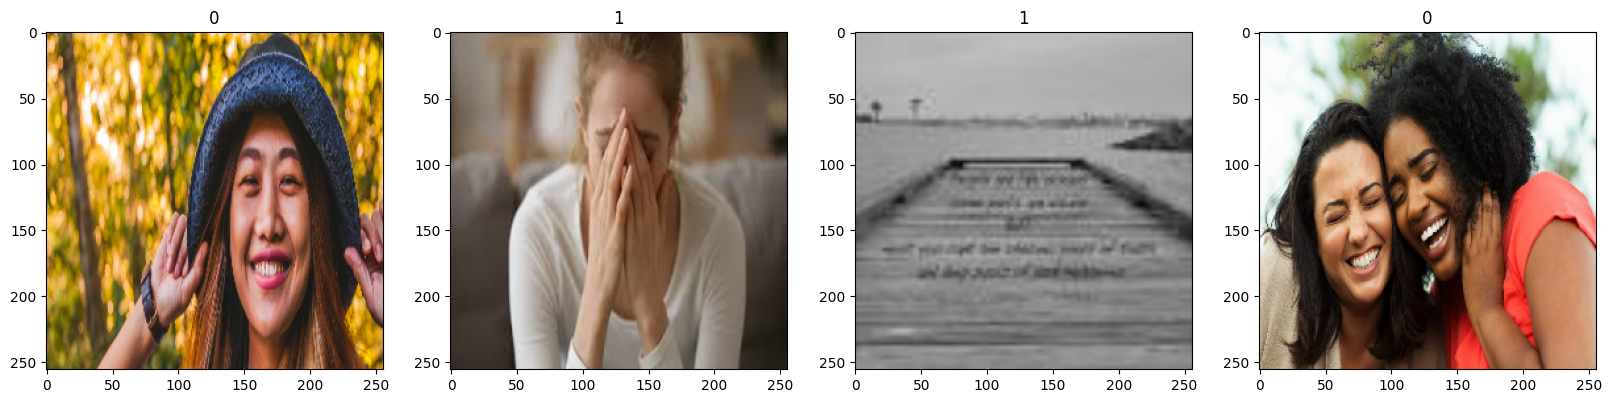

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[3.28201592e-01, 2.14476109e-01, 1.98789835e-01],
          [3.37254912e-01, 2.23529413e-01, 2.07843140e-01],
          [3.22993249e-01, 2.32797176e-01, 2.01424628e-01],
          ...,
          [6.39866769e-01, 3.33984435e-01, 1.92807958e-01],
          [6.35294139e-01, 3.29411775e-01, 1.80392161e-01],
          [6.24299943e-01, 3.14496040e-01, 1.85084268e-01]],
 
         [[2.96829045e-01, 2.02711403e-01, 1.94868267e-01],
          [3.01960796e-01, 2.07843140e-01, 2.00000003e-01],
          [3.01960796e-01, 2.07843140e-01, 1.92156866e-01],
          ...,
          [6.44929528e-01, 3.39047194e-01, 1.90027580e-01],
          [6.39215708e-01, 3.33333343e-01, 1.84313729e-01],
          [6.23529434e-01, 3.13725501e-01, 1.84313729e-01]],
 
         [[2.79151350e-01, 2.03201592e-01, 1.88235298e-01],
          [2.78431386e-01, 2.02481613e-01, 1.87515318e-01],
          [3.01960796e-01, 2.07843140e-01, 1.92156866e-01],
          ...,
          [6.50980413e-01, 3.45098048e-01, 1.9215

# 5. Split Data

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size

7

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [19]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [25]:
logdir='logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


7/7 [==============================] - 14s 2s/step - loss: 0.0098 - accuracy: 0.9955 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 2/20
7/7 [==============================] - 14s 2s/step - loss: 0.0194 - accuracy: 0.9866 - val_loss: 0.0178 - val_accuracy: 0.9844
Epoch 3/20
7/7 [==============================] - 14s 2s/step - loss: 0.0113 - accuracy: 0.9955 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 4/20
7/7 [==============================] - 13s 1s/step - loss: 0.0128 - accuracy: 0.9955 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 11s 1s/step - loss: 0.0196 - accuracy: 0.9955 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 12s 2s/step - loss: 0.0148 - accuracy: 0.9911 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 13s 1s/step - loss: 0.0177 - accuracy: 0.9866 - val_loss: 0.0152 - val_accuracy: 0.9844
Epoch 8/20
7/7 [=============================

# 8. Plot Performance

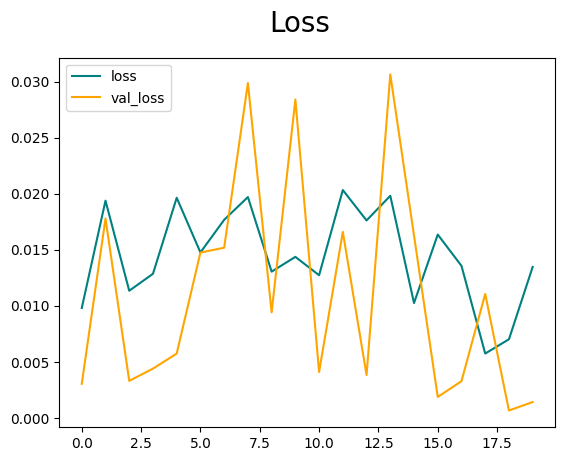

In [59]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

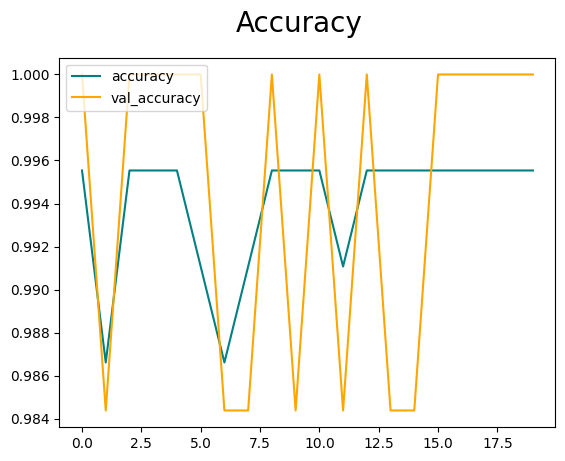

In [60]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [61]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [62]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [63]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 190ms/step


In [64]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [65]:
import cv2

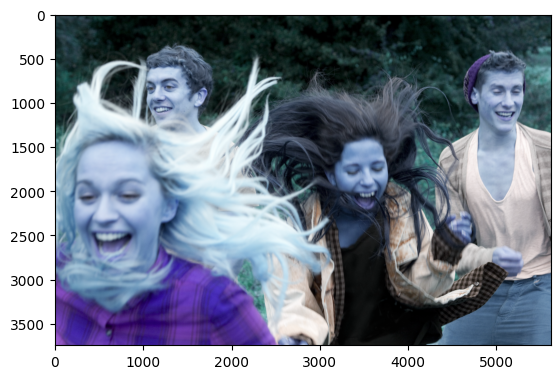

In [66]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

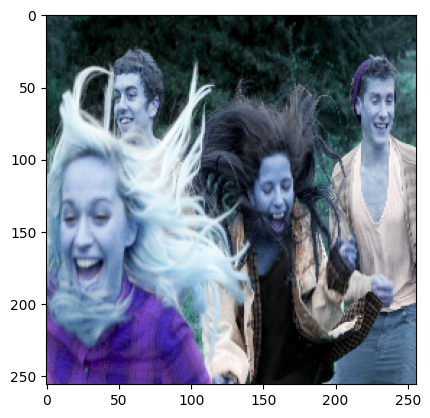

In [67]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [68]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 66ms/step


In [69]:
yhat

array([[2.3964842e-06]], dtype=float32)

In [70]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [74]:
from tensorflow.keras.models import load_model

In [75]:
model.save(os.path.join('models','imageclassifier.h5'))

In [76]:
new_model = load_model('models/imageclassifier.h5')

In [78]:
yhat=new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 95ms/step


In [79]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
